In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
barriers = pd.read_csv('../data/smile_on_barriers.csv')

In [3]:
barriers.head()

,Unnamed: 0,patient_id,cmi_barriers_to_care,insurance,cost,transport,isolation,fear,health
0,227,-2,Dental cost; No insurance,No insurance,Dental cost,NaN,NaN,NaN,NaN
1,47337,-2,Dental cost,NaN,Dental cost,NaN,NaN,NaN,NaN
2,1004,-2,Dental cost; No insurance,No insurance,Dental cost,NaN,NaN,NaN,NaN
3,42738,-2,Dental cost; No insurance; Fear,No insurance,Dental cost,NaN,NaN,Fear,NaN
4,13172,-2,Dental cost; No insurance,No insurance,Dental cost,NaN,NaN,NaN,NaN


In [4]:
grouped = barriers.groupby(['patient_id']).first()

,Unnamed: 0,cmi_barriers_to_care,insurance,cost,transport,isolation,fear,health
patient_id,,,,,,,,
-2,227,Dental cost; No insurance,No insurance,Dental cost,None,None,Fear,None
-1,39621,No insurance,No insurance,None,None,None,None,None
2384106,35889,Dental cost,None,Dental cost,None,None,None,None
2384744,33467,Dental cost,None,Dental cost,None,None,None,None
2384833,57342,No insurance,No insurance,None,None,None,None,None
2384897,57473,Dental cost; No insurance,No insurance,Dental cost,None,None,None,None
2384922,57471,Dental cost; No insurance,No insurance,Dental cost,None,None,None,None
2384932,39475,Dental cost,None,Dental cost,None,None,None,None
2384949,56727,Dental cost; No insurance,No insurance,Dental cost,None,None,None,None


In [5]:
grouped = grouped.drop(['Unnamed: 0', 'cmi_barriers_to_care'], axis=1)

In [6]:
grouped.shape

(10424, 6)

In [18]:
grouped.head()

,insurance,cost,transport,isolation,fear,health
patient_id,,,,,,
-2,No insurance,Dental cost,None,None,Fear,None
-1,No insurance,None,None,None,None,None
2384106,None,Dental cost,None,None,None,None
2384744,None,Dental cost,None,None,None,None
2384833,No insurance,None,None,None,None,None


In [15]:
grouped.plot(x="patient_id", y=["cost", "insurance"], kind = "bar")

KeyError: 'patient_id'

<AxesSubplot:>

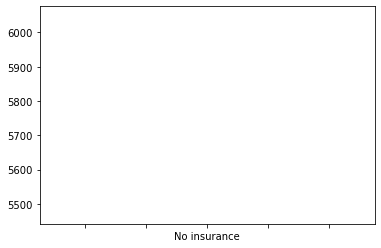

In [17]:
s = grouped['insurance'].value_counts()
s.plot()

In [14]:
barriers.groupby(['insurance'], ['cost'])['patient_id'].nunique().plot(kind='bar')
plt.show()

TypeError: unhashable type: 'list'

<AxesSubplot:>

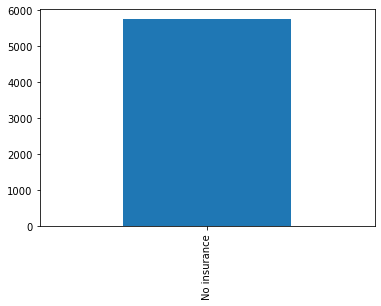

In [19]:
grouped['insurance'].value_counts().plot.bar()

In [8]:
grouped.head(25)
#transpose w/ melt - col 1 factor (insurance) - melt is a function

,insurance,cost,transport,isolation,fear,health
patient_id,,,,,,
-2,No insurance,Dental cost,None,None,Fear,None
-1,No insurance,None,None,None,None,None
2384106,None,Dental cost,None,None,None,None
2384744,None,Dental cost,None,None,None,None
2384833,No insurance,None,None,None,None,None
2384897,No insurance,Dental cost,None,None,None,None
2384922,No insurance,Dental cost,None,None,None,None
2384932,None,Dental cost,None,None,None,None
2384949,No insurance,Dental cost,None,None,None,None


In [25]:
melt_grouped = pd.melt(grouped.reset_index(),id_vars=['patient_id'], value_vars=['insurance', 'cost', 'transport', 'isolation', 'fear', 'health'])

In [70]:
#fig, ax = plt.subplots(figsize=(10, 6))
#group by value and group by variable and then do a count of rows inside each group
barriers1 = melt_grouped.groupby(['value','variable']).count()
#ax.set(title = 'test')
#plt.hist(s)
barriers1

,,patient_id
value,variable,
Dental cost,cost,7905
Fear,fear,655
No insurance,insurance,5759
Personal isolation,isolation,119
Physical mobility and health,health,367
Transportation,transport,822


<ipython-input-92-9f519a1623eb>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(barriers, rotation = 90)


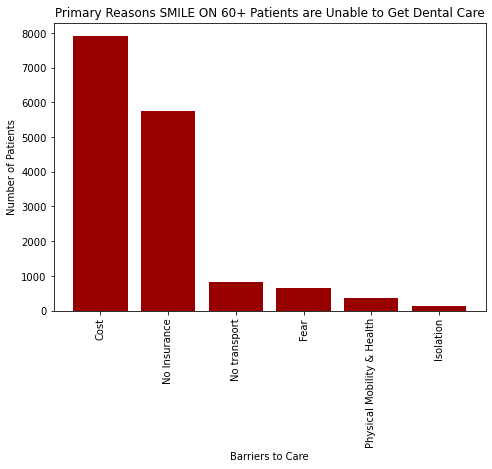

In [92]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
barriers = ['Cost', 'No Insurance', 'No transport', 'Fear', 'Physical Mobility & Health', 'Isolation']
patients = [7905,5759,822,655,367,119]
ax.bar(barriers, patients, color = '#980000')
ax.set_ylabel('Number of Patients')
ax.set_xlabel('Barriers to Care')
ax.set_xticklabels(barriers, rotation = 90)
ax.set_title('Primary Reasons SMILE ON 60+ Patients are Unable to Get Dental Care')
#for index, value in enumerate(patients):
#    plt.text(value, index, str(value))
plt.show()

KeyError: 'variable'

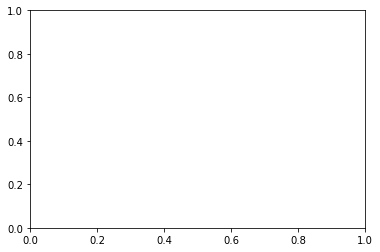

In [74]:
fig, ax = plt.subplots()
ax.plot(barriers1["variable"], barriers1["patient_id"])